In [40]:
import warnings
from IPython.display import clear_output
warnings.filterwarnings('ignore')

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

from scipy.optimize import minimize

import datetime
import time

In [55]:
ETF_list = ["XLC", "VOX", "FCOM", "VDE", "XLI", "ACES", "XHE", "RSPH", "KCE", "KBWP"]
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2024, 4, 10)

ETF_df = pd.DataFrame()
for ETF in ETF_list:
    ETF_data = yf.download(tickers=ETF, start= start, end = end, interval='1d')
    ETF_df[ETF] = ETF_data['Adj Close']  
ETF_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,XLC,VOX,FCOM,VDE,XLI,ACES,XHE,RSPH,KCE,KBWP
Date,,,,,,,,,,
2018-06-19,47.428024,81.521622,27.402472,82.224213,66.086960,NaN,80.471573,18.111277,53.527546,53.708950
2018-06-20,48.016602,81.474770,27.118319,82.739998,66.132080,NaN,80.511475,18.156738,53.703575,53.121624
2018-06-21,47.722317,80.800011,26.834156,81.041878,65.301811,NaN,79.653381,18.062904,53.122623,52.727161
2018-06-22,47.931171,81.296730,27.052013,82.954254,65.527443,NaN,80.122345,18.141260,53.166637,52.858662
2018-06-25,46.943871,80.275230,26.834156,81.097412,64.697166,NaN,78.615685,17.909090,52.268780,52.595684
...,...,...,...,...,...,...,...,...,...,...
2024-04-03,82.809998,132.759995,50.169998,135.399994,125.050003,28.879999,84.849998,30.870001,109.750000,106.610001
2024-04-04,81.690002,131.259995,49.540001,135.229996,123.949997,28.639999,84.459999,30.540001,108.730003,105.279999
2024-04-05,82.519997,132.669998,50.099998,136.699997,125.669998,28.340000,85.660004,30.780001,109.550003,106.040001


# Calculating Standard Deviation for ETFs:

We utilize Standard Deviation, to measure the  volaility of ETFs
$$
Standard Deviation = \sqrt{\frac{\sum_{i=1}^{N}(x_i - \bar{x})^2}{N-1}}
$$


<Axes: >

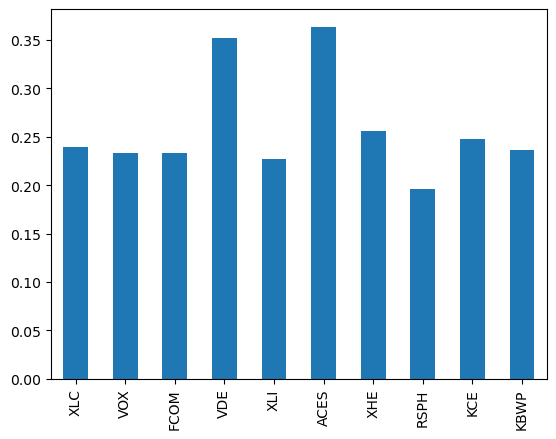

In [56]:
# Utilizing Standard Deviation (Square Root of Variance) to measure the volatility of each ETF
#We multiply this by the square root of 250, because we assume that on average there are 250 trading days per year
Annualized_SD = ETF_df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
Annualized_SD.plot(kind = 'bar')

# Calculating the Covariance:

###            Covariance is the measurment between the relationship between two types of variables
    Negative Cov: When Asset A is performing well, Asset B tends to perform poorly, and vice versa
    Zero Cov: The performance of the assets are unrelated
    Positive Cov: When Asset A is perform well, Asset B tends to perform well, and vice versa

In [57]:
ETF_df_returns = ETF_df.pct_change() # Calculated as: (val[1] - val[0])/val[0]
Cov_Matrix = ETF_df_returns.cov()

# Understanding the Covariance Matrix
### Diagonal
The diagonal yields the variance of each individual ETF
Outside of the diagonal lies the covariance of the ETF's with one another

## Why:
The covariance informs us on the the direction of the relationship between two assets. This is important because in MPT, we are tasked with developing a highly diversified portfolio. Negative covariance implies that the performances of assets have an inverse relaitonship. Adding negatively related assets to a portfolio reduce it's volatility/risk and improve its stability. 

# Calculating the Correlation Coefficient:

In [58]:
Corr_Matrix = ETF_df_returns.corr()

## Why:
The correlation coefficient not only tells us the direction of the relationship between assets, but it also details details the strength of the relationship. Investors prefer to correlation coefficient because its output is standardized on a scale of -1 to 1.
### Interpretation:
    -1: Perfectly negative relationship
     0: Unrelated relationship
     1: Perfectly positive relationship

In [59]:
# plt.figure(figsize=(15,8))
# sns.heatmap(ETF_df_returns.corr(), annot=True)
# plt.title("Correlations between ETFs")
# plt.show()

According to modern portfolio theory, it is preferable to have stocks which are negatively correlated in a portfolio. There are no negatively correlated stocks in the selected stock options. Alternatively, we can assign weights to each stock option to generate a portfolio that maximises return for a given risk. 

Use user risk profile generated from user questionnaire and open banking information to generate a subset of stock options by correlating stock volatility with risk.

# Calculating Portfolio Variance and Standard Deviation

We generate a sample portfolio where each asset has an equal weight within the portfolio. We then calculate the volatility of the portfolio utilizing the variance and standard deviation formulas below. We utilize the covariance and correlaiton matrix for a sample portfolio

## Variance
$$
\text{Portfolio Variance} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \text{Cov}(R_i, R_j)
$$



In [60]:
weights = np.ones(len(ETF_df_returns.columns))/len(ETF_df_returns.columns)
Sample_Portfolio_Var = Cov_Matrix.mul(weights, axis = 0).mul(weights, axis = 1).sum().sum()
Sample_Portfolio_Var

0.00018409962014270586

$$
\text{Portfolio Standard Deviation} = \sqrt{\text{Portfolio Variance}}
$$

Below is the Annual Standard Deviation for our sample Portfolio

In [48]:
Sample_Portfolio_Annual_STD = np.sqrt(Portfolio_Var)*np.sqrt(250)
Sample_Portfolio_Annual_STD

0.2145341582025493

# Calculating Investment Portfolio Expected Return

$$
Expected Return = \sum_{i=1}^{n} w_i \times R_i
$$

Sum of the weighted averages of the expect returns of each asset in our sample portfolio

In [67]:
#Because we are looking at annual returns we calculate the annual return at the end of each year.
df = ETF_df.resample('Y').last().pct_change()
#Gives us the average return for each asset
Expected_Return = df.mean()
#Dot is a np method which computes the sum of the product of 2 numpy arrays, 
#here we are multiplying the weights of each asset by their expected return
Sample_Portfolio_Return = np.dot(weights, Expected_Return)

# Building our Efficiency Frontier

In [77]:
#Covariance Matrix
Cov_Matrix
#Expected Return
Expected_Return
#Annualized SD
SD = ETF_df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

#Creating Expected Return and Volatility Matrix: Axis = 1 --> Concat Column wise
assets = pd.concat([Expected_Return, SD], axis = 1)
assets.columns = ['Expected Return', 'Volatility']
assets

Port_Return = []
Port_Vol = []
Port_Weight = []
Total_ETFs = len(ETF_df.columns)
Total_Portfolios=10000

#Running the same computation demonstrated above, for 10000 Portfolios to construct an efficiency frontier
for portfolio in range(Total_Portfolios):
    #Generate a random weight for each ETF
    weights = np.random.random(Total_ETFs)
    #Adjusting weights of portfolios so they sum to 1
    weights = weights/np.sum(weights)
    returns = np.dot(weights, Expected_Return)
    Port_Return.append(returns)
    var = Cov_Matrix.mul(weights, axis = 0).mul(weights, axis = 1).sum().sum()
    sd = np.sqrt(var)*np.sqrt(250)
    Port_Vol.append(sd)
    
Portfolio_Dict = {'Returns': Port_Return, 'Volatility': Port_Vol}
portfolios = pd.DataFrame(Portfolio_Dict)
portfolios

,Returns,Volatility
0,0.144697,0.217143
1,0.141067,0.208511
2,0.138423,0.201264
3,0.135438,0.208670
4,0.136915,0.213800
...,...,...
9995,0.142238,0.204775
9996,0.138355,0.215870
9997,0.137438,0.209290
9998,0.144877,0.211434


<Axes: xlabel='Volatility', ylabel='Returns'>

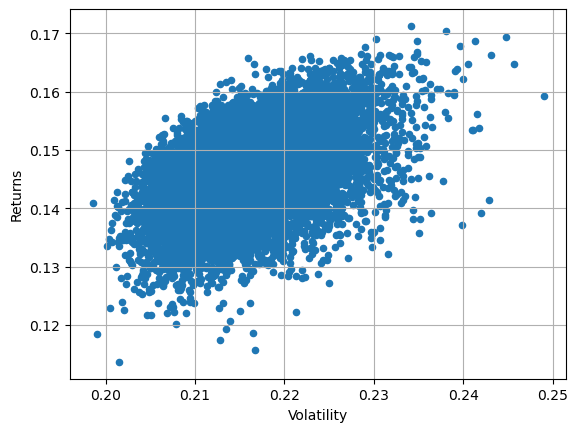

In [78]:
portfolios.plot.scatter(x='Volatility', y='Returns', grid = True)

In [33]:
def portfolio_analyser(weights, returns, risk_free_rate):
    # weights: numpy array of weights for each stock option in the portfolio
    
    mean_returns = returns.mean()
    weighted_annual_return = np.sum(mean_returns * weights)*252
    weighted_annual_risk = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))*np.sqrt(252) # annualised standard deviation 
    
    sharpe_ratio = (weighted_annual_return - risk_free_rate)/weighted_annual_risk

    return [weighted_annual_return, weighted_annual_risk, sharpe_ratio]

In [24]:
weights = np.ones(len(ETF_df_returns.columns))/len(ETF_df_returns.columns)
risk_free_return = 0.02
portfolio_analyser(weights, ETF_df_returns, risk_free_return)
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [25]:
def Portfolio_Optimiser(Optimisation_Criteria, ETF_returns, risk_free_return, method, iter_count):
    # Optimisation_Criteria:
        # a) Return
        # b) Risk
        # c) Sharpe
    
    if Optimisation_Criteria == 'Return': # Return
        def Optimiser(weight):
            return (-1)*portfolio_analyser(weights, ETF_returns, risk_free_return)[0]
    elif Optimisation_Criteria == 'Risk':
        def Optimiser(weight): # Risk
            return portfolio_analyser(weights, ETF_returns, risk_free_return)[1]
    else: # Sharpe
        def Optimiser(weight):
            return (-1)*portfolio_analyser(weights, ETF_returns, risk_free_return)[2]
    
    sharpe = 0
    returns = 0
    risk = 1e99
    ETF_count = len(ETF_returns.columns)
    Weights_Optimised = np.ones(ETF_count)
    weights = np.ones(ETF_count)
    for i in range(iter_count):
        minimiser = minimize(Optimiser, np.random.dirichlet(np.ones(ETF_count)), method = method)
        weights = minimiser['x']
                
        if Optimisation_Criteria == 'Return':
            returns_iter = portfolio_analyser(weights, ETF_df_returns, 0.05)[0]
            if returns_iter > returns:
                returns = returns_iter
                Weights_Optimised = weights
        elif Optimisation_Criteria == 'Risk':
            risk_iter = portfolio_analyser(weights, ETF_df_returns, 0.05)[1]
            if risk_iter < risk:
                risk = risk_iter
                Weights_Optimised = weights
        else:           
            sharpe_iter = portfolio_analyser(weights, ETF_df_returns, 0.05)[2]
            if sharpe_iter > sharpe:
                sharpe = sharpe_iter
                Weights_Optimised = weights
    
    return Weights_Optimised

In [26]:
weights_optimised = Portfolio_Optimiser('Sharpe', ETF_df_returns, 0.05, 'SLSQP', 500)
portfolio_stats = portfolio_analyser(weights_optimised, ETF_df_returns, 0.05)
print('Return = {returns} \nRisk = {risk} \nSharpe = {sharpe}'
      .format(returns = portfolio_stats[0], risk = portfolio_stats[1], sharpe = portfolio_stats[2]))

Return = 0.18475136878800333 
Risk = 0.23944529025465647 
Sharpe = 0.5627647494953508


In [27]:
weights_optimised

array([0.02241664, 0.05118239, 0.00384808, 0.04622165, 0.04495757,
       0.09582439, 0.04001933, 0.03953531, 0.58532596, 0.07066868])

In [28]:
weights_optimised = Portfolio_Optimiser('Sharpe', ETF_df_returns, 0.05, 'L-BFGS-B', 500)
portfolio_stats = portfolio_analyser(weights_optimised, ETF_df_returns, 0.05)
print('Return = {returns} \nRisk = {risk} \nSharpe = {sharpe}'
      .format(returns = portfolio_stats[0], risk = portfolio_stats[1], sharpe = portfolio_stats[2]))

Return = 0.18014109922455768 
Risk = 0.22465859221711726 
Sharpe = 0.5792838722090147


In [38]:
weights_optimised

array([0.19422329, 0.01055783, 0.05064937, 0.02300111, 0.15470954,
       0.01206783, 0.02943735, 0.29787281, 0.02773559, 0.19974528])

In [30]:
weights_optimised = Portfolio_Optimiser('Return', ETF_df_returns, 0.05, 'SLSQP', 500)
portfolio_stats = portfolio_analyser(weights_optimised, ETF_df_returns, 0.05)
print('Return = {returns} \nRisk = {risk} \nSharpe = {sharpe}'
      .format(returns = portfolio_stats[0], risk = portfolio_stats[1], sharpe = portfolio_stats[2]))

Return = 0.18510593911996598 
Risk = 0.24036072401875785 
Sharpe = 0.5620965724392737


In [31]:
weights_optimised

array([0.05298749, 0.02775668, 0.08143429, 0.00183804, 0.09918408,
       0.08768239, 0.02448208, 0.01118807, 0.60875838, 0.0046885 ])

In [32]:
weights_optimised = Portfolio_Optimiser('Return', ETF_df_returns, 0.05, 'L-BFGS-B', 500)
portfolio_stats = portfolio_analyser(weights_optimised, ETF_df_returns, 0.05)
print('Return = {returns} \nRisk = {risk} \nSharpe = {sharpe}'
      .format(returns = portfolio_stats[0], risk = portfolio_stats[1], sharpe = portfolio_stats[2]))

Return = 0.181559463577626 
Risk = 0.23619654963243542 
Sharpe = 0.5569914707998754


In [33]:
weights_optimised

array([0.12754094, 0.0202565 , 0.01292308, 0.05759473, 0.07754125,
       0.10145536, 0.03727774, 0.0042044 , 0.48130713, 0.07989886])

In [34]:
weights_optimised = Portfolio_Optimiser('Risk', ETF_df_returns, 0.05, 'SLSQP', 500)
portfolio_stats = portfolio_analyser(weights_optimised, ETF_df_returns, 0.05)
print('Return = {returns} \nRisk = {risk} \nSharpe = {sharpe}'
      .format(returns = portfolio_stats[0], risk = portfolio_stats[1], sharpe = portfolio_stats[2]))

Return = 0.14912540068862015 
Risk = 0.2035363306881167 
Sharpe = 0.4870157595624156


In [35]:
weights_optimised

array([0.04509551, 0.12443677, 0.23794054, 0.03625549, 0.07871127,
       0.00251962, 0.01674086, 0.30587269, 0.04384752, 0.10857974])

In [36]:
weights_optimised = Portfolio_Optimiser('Risk', ETF_df_returns, 0.05, 'L-BFGS-B', 500)
portfolio_stats = portfolio_analyser(weights_optimised, ETF_df_returns, 0.05)
print('Return = {returns} \nRisk = {risk} \nSharpe = {sharpe}'
      .format(returns = portfolio_stats[0], risk = portfolio_stats[1], sharpe = portfolio_stats[2]))

Return = 0.15506580196934694 
Risk = 0.2009428228589345 
Sharpe = 0.5228641683963255


In [37]:
weights_optimised

array([0.19422329, 0.01055783, 0.05064937, 0.02300111, 0.15470954,
       0.01206783, 0.02943735, 0.29787281, 0.02773559, 0.19974528])